In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [19]:
sns.set_theme(style="darkgrid")

In [20]:
ratings_df = pd.read_csv("data/Ratings.csv", index_col=0)
amount_df = pd.read_csv("data/Amount.csv", index_col=0)
ead_multiplier_df = pd.read_csv("data/EAD.csv", index_col=0)
lgd = pd.read_csv("data/LGD.csv", index_col=0)

In [21]:
ratings_count = (
    ratings_df.apply(pd.Series.value_counts)
    .reindex(["AAA", "AA", "A", "BBB", "BB", "B", "C", "D"])
    .fillna(0)
    .astype(int)
)
ratings_count

,Year 1,Year 2,Year 3,Year 4,Year 5,Year 6,Year 7,Year 8,Year 9,Year 10
AAA,243,250,269,248,266,248,267,255,270,239
AA,293,236,271,252,241,236,259,260,258,260
A,265,267,236,225,242,262,229,236,233,258
BBB,260,248,228,244,225,258,254,234,234,246
BB,248,266,227,266,270,249,241,245,247,235
B,221,261,253,256,265,262,261,252,255,253
C,226,242,249,265,252,260,248,275,252,274
D,244,230,267,244,239,225,241,243,251,235


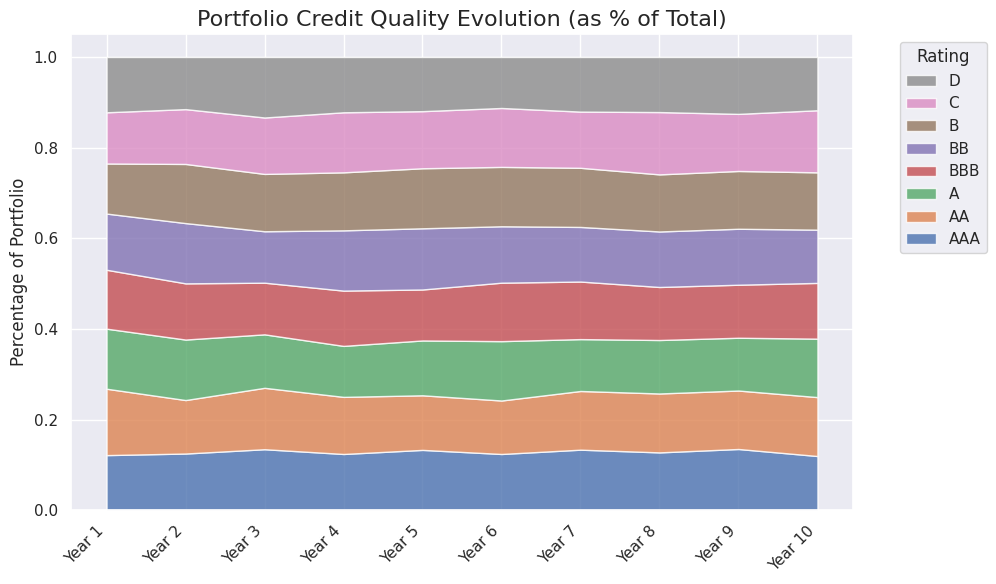

In [22]:
df = (ratings_count / 2000).T
plt.figure(figsize=(12, 6))
plt.stackplot(
    df.index,
    [df[col] for col in df.columns],
    labels=df.columns,
    alpha=0.8,
)
plt.title("Portfolio Credit Quality Evolution (as % of Total)", fontsize=16)
plt.ylabel("Percentage of Portfolio", fontsize=12)
plt.xticks(rotation=45, ha="right")
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(
    handles[::-1],
    labels[::-1],
    title="Rating",
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
)
plt.tight_layout(rect=(0, 0, 0.85, 1))
plt.show()

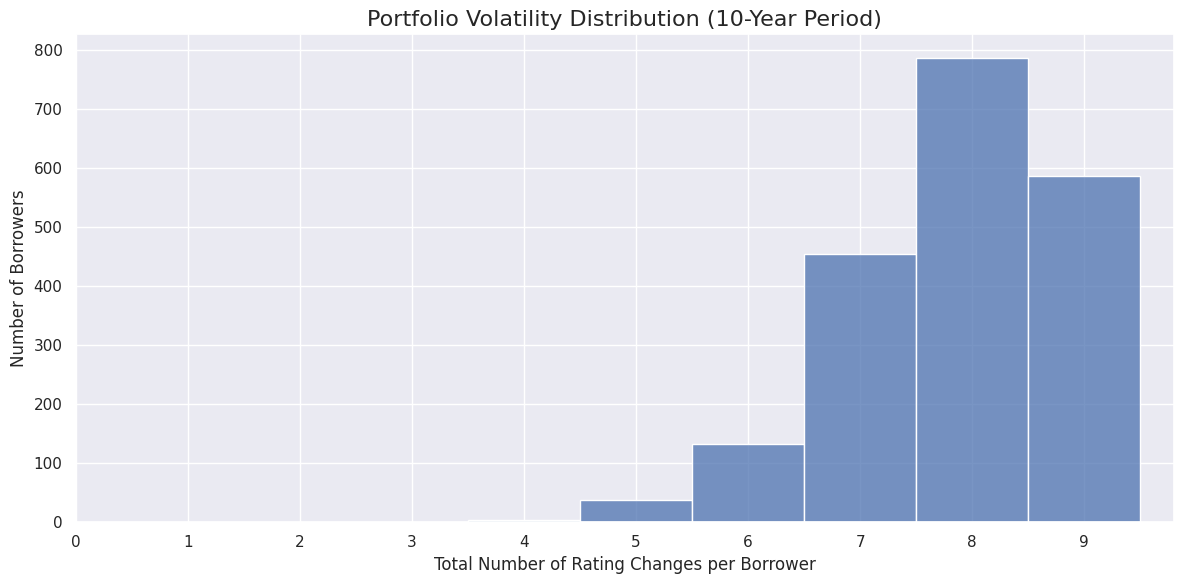

In [23]:
volatility_count = ratings_df.apply(lambda r: (r != r.shift()).sum() - 1, axis=1)
plt.figure(figsize=(12, 6))
sns.histplot(
    volatility_count,
    discrete=True,
    kde=False,
)
plt.title("Portfolio Volatility Distribution (10-Year Period)", fontsize=16)
plt.xlabel("Total Number of Rating Changes per Borrower", fontsize=12)
plt.ylabel("Number of Borrowers", fontsize=12)
plt.xticks(range(int(volatility_count.max()) + 1))
plt.tight_layout()
plt.show()

In [24]:
ead_df = amount_df * ead_multiplier_df
ead_df

,Year 1,Year 2,Year 3,Year 4,Year 5,Year 6,Year 7,Year 8,Year 9,Year 10
Borrower Number,,,,,,,,,,
1,12.810614,34.770512,28.718416,40.408848,23.316523,10.009906,12.922705,37.298318,47.674596,16.865315
2,5.282260,24.560620,3.154042,33.229493,10.717220,20.158502,3.862200,39.439464,41.695822,44.597097
3,16.637706,4.924824,41.839875,22.633789,16.511762,6.858320,56.214754,12.806135,35.340573,3.779069
4,2.076288,35.098718,15.148340,23.206436,35.030467,26.938684,44.093305,20.070455,10.725917,23.815188
5,16.037031,22.651730,4.717183,25.176720,15.247376,15.916207,25.931473,2.130878,19.531495,4.432807
...,...,...,...,...,...,...,...,...,...,...
1996,21.413156,23.173165,35.898508,16.101259,23.107668,16.022663,19.673962,11.045350,19.882677,20.676768
1997,26.602382,14.325095,21.700151,30.335485,29.732503,25.909430,24.265779,23.248249,17.657489,5.880102
1998,8.264673,34.784682,50.566567,25.274536,34.774062,11.620097,9.302535,11.835778,14.954926,28.543100


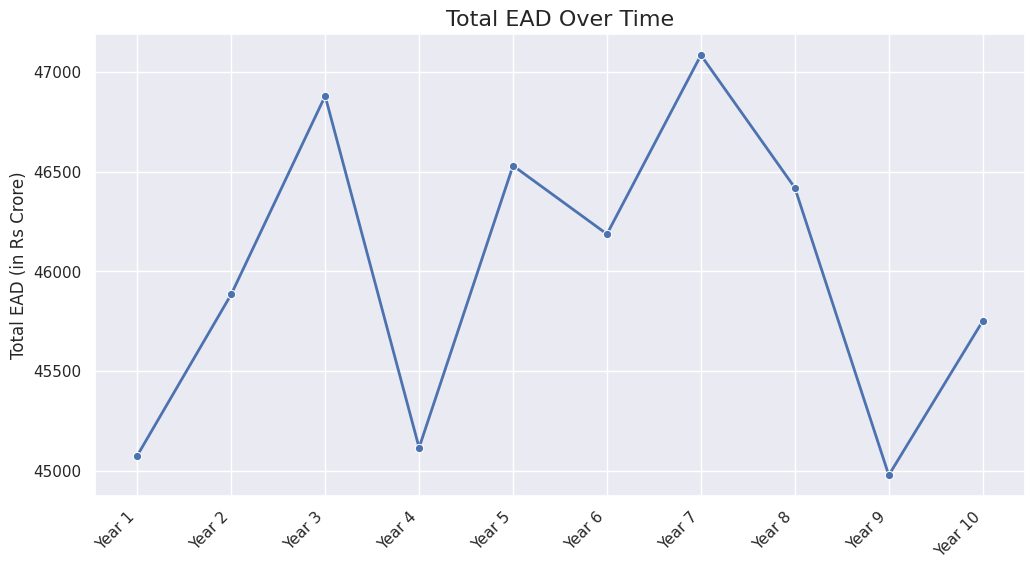

In [26]:
total_ead = ead_df.sum(axis=0)
total_ead.name = "Total EAD (Rs. Cr)"
plt.figure(figsize=(12, 6))
sns.lineplot(data=total_ead, marker="o", linewidth=2)
plt.title("Total EAD Over Time", fontsize=16)
plt.ylabel("Total EAD (in Rs Crore)", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.show()

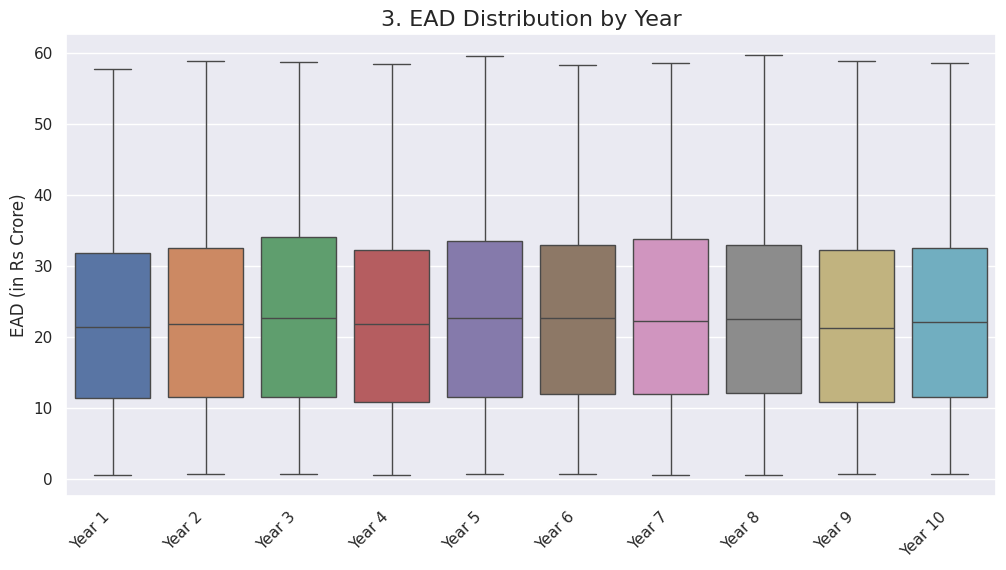

In [29]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=ead_df, orient="v")
plt.title("3. EAD Distribution by Year", fontsize=16)
plt.ylabel("EAD (in Rs Crore)", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.show()